# An overview of solar cycle 23 and 24 data

This notebooks shows the exploratory data analysis of the solar flare and active region characteristics of the GOES flare list collated with the AR information from the SRS files. 

The two databases used here are the 

* `flare_AR_23_24.csv`
* `AR_flare_ml_23_24.csv`

The `flare_AR_23_24.csv` database is a pandas dataframe that contains the the GOES flare list for flares that have an associated active region, and the associated active region information.

The `AR_flare_ml_23_24.csv` database is a pandas dataframe that contains the daily reported active regions and their properties, and the information whether that active region on that day flared. 

Both csv files are created in `making_ml_df_sc23-24.py`

In [156]:
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import dates
from matplotlib.colors import LogNorm
import numpy as np 
import seaborn as sns
import datetime
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import ScalarFormatter
from astropy.visualization import hist

import seaborn as sns
# plotting setups
plt.rcParams['xtick.direction'] = "in"
plt.rcParams['ytick.direction'] = "in"
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['font.family'] = 'Helvetica'
sns.set_context("paper", font_scale=1.2)

import warnings
warnings.filterwarnings("ignore")

In [157]:
flare_list = pd.read_csv("flare_AR_23_24.csv")
flare_list["datetime"] = pd.to_datetime(flare_list["matchtime"])
flare_list["unique_month"] = pd.to_datetime(flare_list.datetime.dt.strftime("%Y-%m"))

In [158]:
flare_list["goes_class"].unique()

array(['C1.0', 'C2.8', 'C1.3', 'C1.8', 'C8.0', 'C1.2', 'C4.6', 'C5.8',
       'C1.6', 'C1.1', 'M1.0', 'C8.6', 'C5.2', 'C2.7', 'C2.3', 'C3.9',
       'C2.2', 'C6.8', 'M1.3', 'C8.5', 'C4.0', 'C4.5', 'C1.9', 'C1.4',
       'C4.1', 'C1.7', 'C3.1', 'C3.5', 'C9.7', 'C2.5', 'C1.5', 'C4.4',
       'C3.4', 'M1.7', 'C4.7', 'C5.1', 'M5.9', 'M3.0', 'C8.3', 'C7.2',
       'C2.6', 'C3.3', 'C5.9', 'M1.4', 'C4.3', 'C3.2', 'C3.7', 'M4.1',
       'X2.1', 'C3.0', 'C7.0', 'C3.6', 'C2.0', 'M2.0', 'X2.6', 'C3.8',
       'M6.8', 'C2.4', 'C5.0', 'M6.4', 'C2.9', 'M1.2', 'C6.6', 'C2.1',
       'C6.5', 'M1.1', 'C5.4', 'C7.5', 'M1.8', 'C7.9', 'C6.4', 'M2.4',
       'C4.9', 'C6.7', 'C5.7', 'C8.8', 'C8.2', 'C9.9', 'X1.0', 'X1.1',
       'C5.6', 'M2.5', 'M2.9', 'C4.8', 'C8.7', 'M1.9', 'C5.5', 'M3.3',
       'C9.5', 'M3.1', 'C7.6', 'M1.5', 'X2.8', 'X4.9', 'M2.3', 'M2.2',
       'M2.1', 'M7.1', 'C6.0', 'C6.1', 'M2.8', 'M1.6', 'C4.2', 'C9.1',
       'C8.1', 'C7.1', 'C7.7', 'C9.4', 'C6.9', 'M2.7', 'C5.3', 'X2.2',
      

In [159]:
def get_goes_class(x):
    if len(x)==0:
        return 1e-8

    if x[0]=="C":

        try:
            return float(x[1:])*1e-6
        except:
            return 1e-6
    elif x[0] == "M":
        return float(x[1:])*(1e-5)
    elif x[0] == "X":
        return float(x[1:])*(1e-4)
    elif x[0] == "B":
        return float(x[1:])*(1e-7)
    elif x[0] == "A":
        return float(x[1:])*(1e-8)
    else:
        return

In [160]:
flare_list["goes_class_val"] = flare_list["goes_class"].map(get_goes_class)

In [161]:
def read_ssn():
    """
    Function just to read the SSN data from the downloaded csv file (see above for link)
    """

    ssn = pd.read_csv("/Users/laurahayes/spaceweather_stuff/SolarStatsStuff/SN_m_tot_V2.0.csv", names=['year', 'month', 'decimal_date', \
                                                  'ssn', 'ssn_dev', 'number_obs', 'indicator'], 
             delimiter=';')
    years = ssn['year'].values; months = ssn['month']
    tt = [datetime.datetime(ssn['year'][i], ssn['month'][i], 1) for i in range(len(ssn))]


    ssn['times'] = tt

    return ssn.set_index('times')

ssn = read_ssn()
ssn = ssn.truncate("1996-08-01", "2019-01-01")["ssn"]

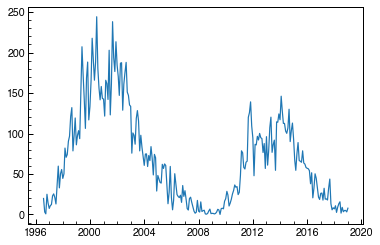

In [162]:
plt.plot(ssn)

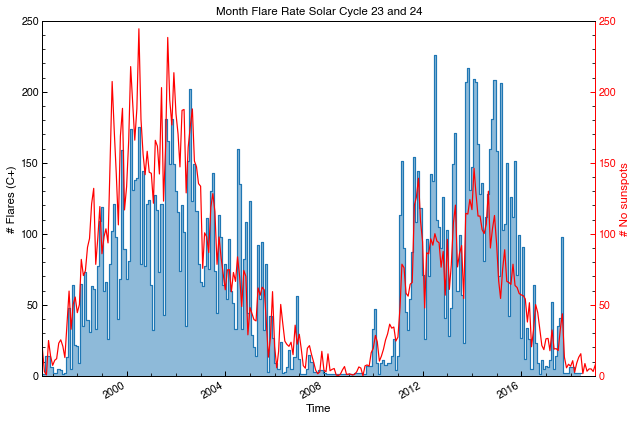

In [163]:
fig, ax = plt.subplots(figsize=(9, 6))
flare_list.groupby("unique_month")["goes_class_ind"].count().plot(drawstyle="steps-mid", axes=ax)


ax.xaxis.set_major_locator(dates.MonthLocator(interval=12))
ax.xaxis.set_minor_locator(dates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y-%b"))
ax.set_xlabel("Time")
ax.set_ylabel("# Flares (C+)")
ax.set_title("Month Flare Rate Solar Cycle 23 and 24")
ax.tick_params(which="both", direction="in")
ax.set_xlim('1996-08-01', '2018-12-31')
ax.set_ylim(0, 250)
ax.fill_between(flare_list.groupby("unique_month")["goes_class_ind"].count().index, 
                flare_list.groupby("unique_month")["goes_class_ind"].count().values, 
                step="mid", alpha=0.5)

ax2 = ax.twinx()
ax2.plot(ssn, color="r")#, drawstyle="steps-mid")
ax2.set_ylim(0, 250)
ax2.set_ylabel("# No sunspots", color='r')
ax2.spines['right'].set_color('r') 
ax2.tick_params(axis="y", colors="r")

plt.tight_layout()

plt.savefig("./final_overview_23_24/monthly_rates_ssn.png", dpi=300, facecolor="w", bbox_inches="tight")


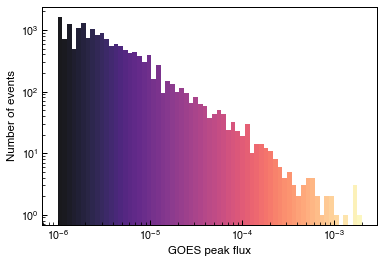

In [164]:
from matplotlib import colors
fig, ax = plt.subplots()
# first get the linear bins (bin size I just chose a random one)
n, linear_bins = np.histogram(flare_list['goes_class_val'].values, bins=65) 
# now define the log bins
logbins = np.logspace(np.log10(linear_bins[0]),np.log10(linear_bins[-1]),len(linear_bins))

n, bins, patches = ax.hist(flare_list['goes_class_val'], bins=logbins, alpha=0.9, color='green')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('GOES peak flux')
ax.set_ylabel('Number of events')

fracs = linear_bins
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.get_cmap('magma')(norm(thisfrac))
    thispatch.set_facecolor(color)



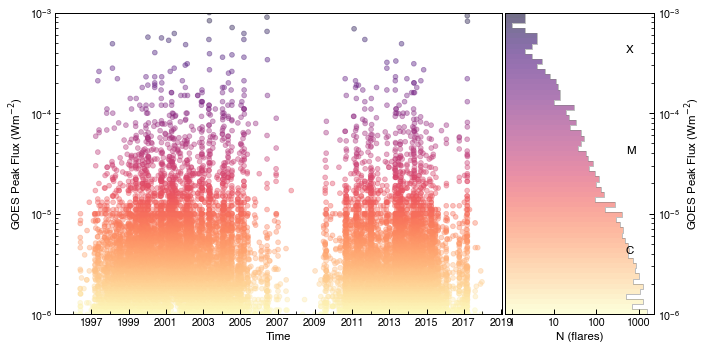

In [168]:
cmap="magma_r"
fig, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(10, 5))


ax01 = ax0
# ax0.set_xlim(parse_time("2010-01-01").datetime, parse_time("2018-12-31").datetime)
ax01.scatter(flare_list["datetime"], flare_list["goes_class_val"], c=flare_list["goes_class_val"], 
            cmap=cmap, alpha=0.4, norm=LogNorm())
ax01.xaxis.set_major_locator(dates.MonthLocator(interval=24))
ax01.xaxis.set_minor_locator(dates.MonthLocator(interval=12))
ax01.xaxis.set_major_formatter(dates.DateFormatter("%Y"))

ax01.set_xlabel("Time")
ax01.set_yscale("log")
ax01.set_ylim(1e-6, 1e-3)
ax01.tick_params(which='both',  direction='in', labelright=False)
ax01.set_ylabel('GOES Peak Flux (Wm$^{-2}$)')


# histogram
Na, binsa, patches = ax1.hist(flare_list['goes_class_val'], orientation='horizontal', 
                              bins=logbins, alpha=0.6)

ax1.step(Na, binsa[:-1], color='grey', lw=0.5) #overplot step

logbins = np.logspace(np.log10(linear_bins[0]),np.log10(linear_bins[-1]),len(linear_bins))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(flare_list['goes_class_val'].min(), 5e-3)
ax1.tick_params(which='both',  direction='in', labelleft=False, labelright=True,  
                left=False, right=True)
ax1.set_ylabel('GOES Peak Flux (Wm$^{-2}$)')
ax1.yaxis.set_label_position("right")
ax1.set_xticks([1,10,100, 1000]) 
ax1.xaxis.set_major_formatter(ScalarFormatter())


ax1.set_ylim(1e-6, 1e-3)
fracs = linear_bins
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.get_cmap(cmap)(norm(thisfrac))
    thispatch.set_facecolor(color)

ax1.text(500, 4e-6, 'C', color='k', fontweight='bold')
ax1.text(500, 4e-5, 'M', color='k', fontweight='bold')
ax1.text(500, 4e-4, 'X', color='k', fontweight='bold')

ax1.set_xlabel('N (flares)')
plt.tight_layout()
plt.subplots_adjust(wspace=0.01)


plt.savefig("./final_overview_23_24/together_plots_goesclass.png", dpi=300, facecolor="w", bbox_inches="tight")



## Compare with AR info

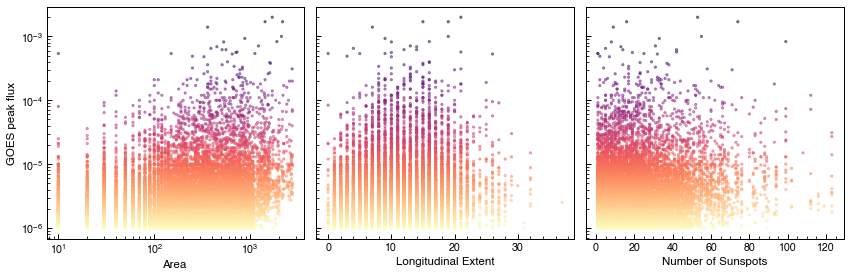

In [167]:
flare_list_a = flare_list[flare_list["AREA"]>1]

fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True)


ax[0].scatter(flare_list_a["AREA"], flare_list_a["goes_class_val"], marker='.', c=flare_list_a["goes_class_val"], 
              alpha=0.5, norm=LogNorm(), cmap=cmap)
ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[0].set_ylabel("GOES peak flux")
ax[0].set_xlabel("Area")

ax[1].scatter(flare_list["Longitude_extent"], flare_list["goes_class_val"], marker='.', c=flare_list["goes_class_val"], 
              alpha=0.5, norm=LogNorm(), cmap=cmap)
ax[1].set_yscale("log")
#ax[1].set_ylabel("GOES peak flux")
ax[1].set_xlabel("Longitudinal Extent")

ax[2].scatter(flare_list["No_sunspots"], flare_list["goes_class_val"], marker='.',  c=flare_list["goes_class_val"],
              alpha=0.5, norm=LogNorm(), cmap=cmap)
ax[2].set_yscale("log")
#ax[2].set_ylabel("GOES peak flux")
ax[2].set_xlabel("Number of Sunspots")

plt.tight_layout()

plt.savefig("./final_overview_23_24/ar_comparisons_flares.png", dpi=300, facecolor="w", bbox_inches="tight")




In [170]:
flare_list["MAGTYPE"].unique()

array(['ALPHA', 'BETA', nan, 'BETA-GAMMA', 'BETA-GAMMA-DELTA',
       'GAMMA-DELTA', 'BETA-DELTA', 'GAMMA'], dtype=object)

In [191]:
group_magtype = flare_list.groupby(["MAGTYPE", "goes_class_ind"]).count()["C"].unstack()
group_magtype_norm = group_magtype/flare_list.groupby(["goes_class_ind"]).count()["C"]

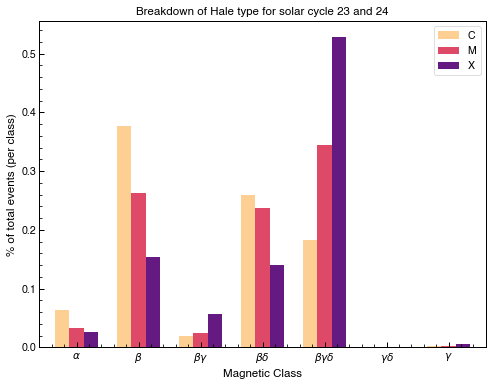

In [218]:
order = ['ALPHA', 'BETA', 'BETA-GAMMA', 'BETA-DELTA',  'BETA-GAMMA-DELTA', 'GAMMA-DELTA', 'GAMMA']
labels = [r'$\alpha$', r'$\beta$', r'$\beta\gamma$', r'$\beta\delta$', r'$\beta\gamma\delta$', r'$\gamma\delta$', r'$\gamma$']
marker = ['o', '.', '+', '^', '*', '.', '.']
colors = ['pink', 'green', 'blue', 'yellow', 'red']
colors=plt.cm.magma_r(np.linspace(0.1,1,4))


fig, ax = plt.subplots(figsize=(8, 6))
group_magtype_norm.plot.bar(color=colors, ax=ax, width=0.7)
ax.legend(["C", "M", "X"])
ax.set_xticklabels(labels, rotation=0)
ax.set_xlabel("Magnetic Class")
ax.set_ylabel("% of total events (per class)")
ax.set_title("Breakdown of Hale type for solar cycle 23 and 24")
plt.savefig("./final_overview_23_24/breakdown_class_flares_norm.png", facecolor="w", dpi=300, bbox_inches="tight")

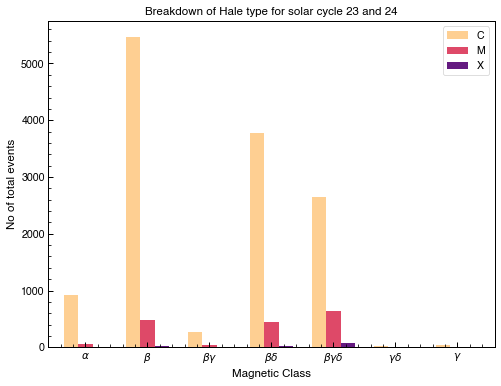

In [219]:

fig, ax = plt.subplots(figsize=(8, 6))
group_magtype.plot.bar(color=colors, ax=ax, width=0.7)
ax.legend(["C", "M", "X"])
ax.set_xticklabels(labels, rotation=0)
ax.set_xlabel("Magnetic Class")
ax.set_ylabel("No of total events")
ax.set_title("Breakdown of Hale type for solar cycle 23 and 24")
plt.savefig("./final_overview_23_24/breakdown_class_flares.png", facecolor="w", dpi=300, bbox_inches="tight")



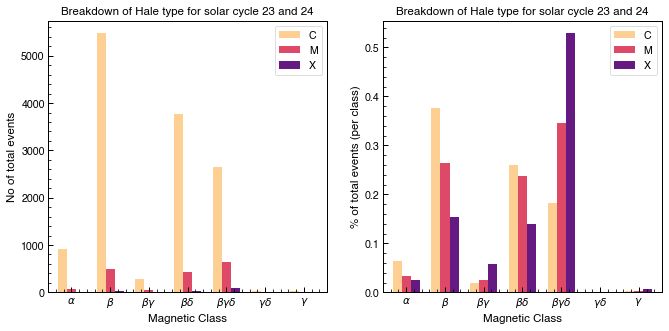

In [221]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))


group_magtype.plot.bar(color=colors, ax=ax1, width=0.7)
ax1.legend(["C", "M", "X"])
ax1.set_xticklabels(labels, rotation=0)
ax1.set_xlabel("Magnetic Class")
ax1.set_ylabel("No of total events")
ax1.set_title("Breakdown of Hale type for solar cycle 23 and 24")

group_magtype_norm.plot.bar(color=colors, ax=ax2, width=0.7)
ax2.legend(["C", "M", "X"])
ax2.set_xticklabels(labels, rotation=0)
ax2.set_xlabel("Magnetic Class")
ax2.set_ylabel("% of total events (per class)")
ax2.set_title("Breakdown of Hale type for solar cycle 23 and 24")

plt.savefig("./final_overview_23_24/breakdown_class_flares_tog.png", facecolor="w", dpi=300, bbox_inches="tight")




# area and flare rates

In [210]:
order_df = {'ALPHA':1, 'BETA':2, 'BETA-GAMMA':3,  'BETA-DELTA':4,  'BETA-GAMMA-DELTA':5, 'GAMMA-DELTA':6, 'GAMMA':7}
flare_list["mag_type_no"] = flare_list["MAGTYPE"].map(order_df)


flare_list1 = flare_list[flare_list["AREA"]>1]

In [211]:
unique_ar = flare_list1["noaa_ar"].unique()
max_events = []
for ar in unique_ar:
    unique_df = flare_list1[flare_list1.noaa_ar.isin([ar])]
    event = {}
    event["ar_num"] = ar
    event["number_flares"] = len(unique_df)
    event["c_flares"] = np.sum(unique_df["goes_class_ind"].isin(["C"]))
    event["m_flares"] = np.sum(unique_df["goes_class_ind"].isin(["M"]))
    event["x_flares"] = np.sum(unique_df["goes_class_ind"].isin(["X"]))
    event["max_flare"] = np.max(unique_df["goes_class_val"])
    event["max_area"] = np.max(unique_df["AREA"])
    event["max_sunspots"] = np.max(unique_df["No_sunspots"])    
    event["ar_class_max"] = unique_df.iloc[np.argmax(unique_df["goes_class_val"])]["MAGTYPE"]
    event["largest_mag_class"] = unique_df.iloc[np.argmax(unique_df["mag_type_no"])]["MAGTYPE"]
    max_events.append(event)

max_events = pd.DataFrame(max_events)

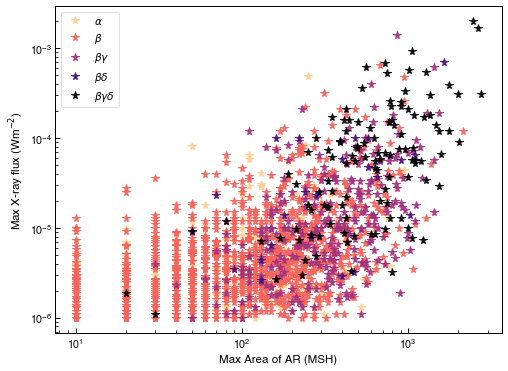

In [215]:
order = ['ALPHA', 'BETA', 'BETA-GAMMA', 'BETA-DELTA',  'BETA-GAMMA-DELTA']#, 'GAMMA-DELTA', 'GAMMA']
labels = [r'$\alpha$', r'$\beta$', r'$\beta\gamma$', r'$\beta\delta$', r'$\beta\gamma\delta$']#, r'$\gamma\delta$', r'$\gamma$']
marker = ['o', '.', '+', '^', '*', '.', '.']
colors = ['pink', 'green', 'blue', 'yellow', 'red']
colors=plt.cm.magma_r(np.linspace(0.1,1,len(order)))
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(len(order)):
    aa = max_events[max_events["ar_class_max"].isin([order[i]])]
    plt.plot(aa["max_area"], aa["max_flare"], marker="*", ms=8, ls='', color=colors[i], alpha=0.9, 
             label=labels[i])

plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.tick_params(which="both", direction="in")
plt.xlabel("Max Area of AR (MSH)")
plt.ylabel("Max X-ray flux (Wm$^{-2}$)")

plt.savefig("./final_overview_23_24/max_flare_area.png", facecolor="w", dpi=300, bbox_inches="tight")



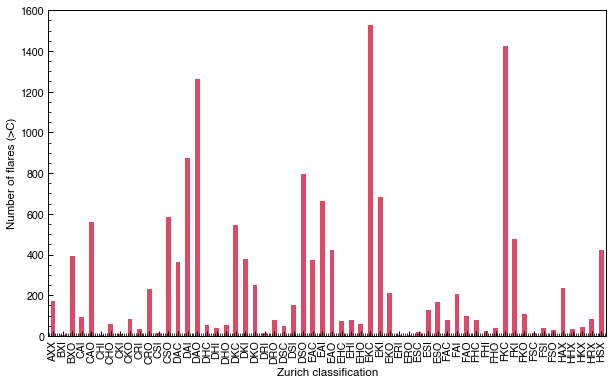

In [235]:
fig, ax = plt.subplots(figsize=(10, 6))
flare_list.groupby(["Z"]).sum()["C+"].plot.bar(color=colors[1])
ax.set_ylabel("Number of flares (>C)")
ax.set_xlabel("Zurich classification")

plt.savefig("./final_overview_23_24/zurich_comparisons.png", facecolor="w", dpi=300, bbox_inches="tight")


In [277]:
flare_list1["zurich"] = flare_list1["Z"].map(lambda x: x[0])
flare_list1["penumbral"] = flare_list1["Z"].map(lambda x: x[1])
flare_list1["compact"] = flare_list1["Z"].map(lambda x: x[2])

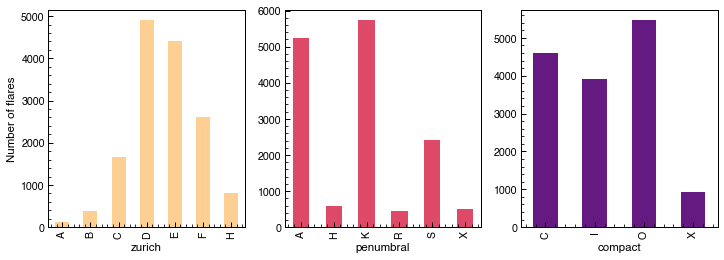

In [282]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
flare_list1.groupby(["zurich"])["C+"].sum().plot.bar(ax=ax[0], color=colors[0])
flare_list1.groupby(["penumbral"])["C+"].sum().plot.bar(ax=ax[1], color= colors[1])
flare_list1.groupby(["compact"])["C+"].sum().plot.bar(ax=ax[2], color= colors[2])
ax[0].set_ylabel("Number of flares")
plt.savefig("./final_overview_23_24/zurich_comparisons_breakdown.png", facecolor="w", dpi=300, bbox_inches="tight")



In [237]:
flare_list.groupby(["Z"]).sum()["C+"].min()

3

In [223]:
flare_list.keys()

Index(['matchtime', 'goes_class_ind', 'noaa_ar', 'goes_class', 'C', 'M', 'X',
       'C+', 'M+', 'X+', 'ar_noaanum', 'LOCATION', 'Carrington_long', 'AREA',
       'Z', 'Longitude_extent', 'No_sunspots', 'MAGTYPE', 'AR issue_date',
       'Latitude', 'Longitude', 'datetime', 'unique_month', 'goes_class_val',
       'mag_type_no'],
      dtype='object')

# Now look at active regions that flare and those that do not!

In [239]:
data = pd.read_csv("AR_flare_ml_23_24.csv")

In [257]:
print("C flares % {:.02f}".format(100*np.sum(data["C"]>0)/len(data)))
print("M flares % {:.02f}".format(100*np.sum(data["M"]>0)/len(data)))
print("X flares % {:.02f}".format(100*np.sum(data["X"]>0)/len(data)))

C flares % 17.86
M flares % 3.41
X flares % 0.38


In [240]:
data = data[(data["AR issue_date"] > "1996-08-06")]
data.reset_index(inplace=True, drop=True)

In [283]:
data["zurich"] = data["McIntosh"].map(lambda x: x[0])
data["penumbral"] = data["McIntosh"].map(lambda x: x[1])
data["compact"] = data["McIntosh"].map(lambda x: x[2])

In [284]:
ar_w_flare = data[data["C+"]>0]
ar_no_flare = data[data["C+"]==0]

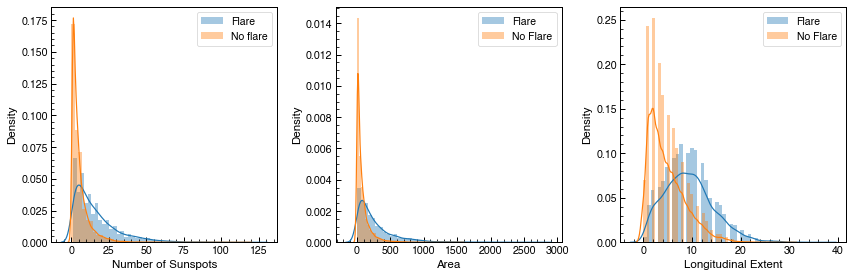

In [285]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
sns.distplot(ar_w_flare["No_sunspots"], ax=ax[0], label="Flare")
sns.distplot(ar_no_flare["No_sunspots"], ax=ax[0], label="No flare")
ax[0].set_xlabel("Number of Sunspots")

sns.distplot(ar_w_flare["AREA"], ax=ax[1], label="Flare")
sns.distplot(ar_no_flare["AREA"], ax=ax[1], label="No Flare")
ax[1].set_xlabel("Area")

sns.distplot(ar_w_flare["Longitude_extent"], ax=ax[2], label="Flare")
sns.distplot(ar_no_flare["Longitude_extent"], ax=ax[2], label="No Flare")
ax[2].set_xlabel("Longitudinal Extent")

for a in ax:
    a.tick_params(which="both", direction="in")
    a.legend(loc="upper right")
    
plt.tight_layout()

plt.savefig("./final_overview_23_24/flare_noflare_numerical.png", facecolor="w", dpi=300, bbox_inches="tight")




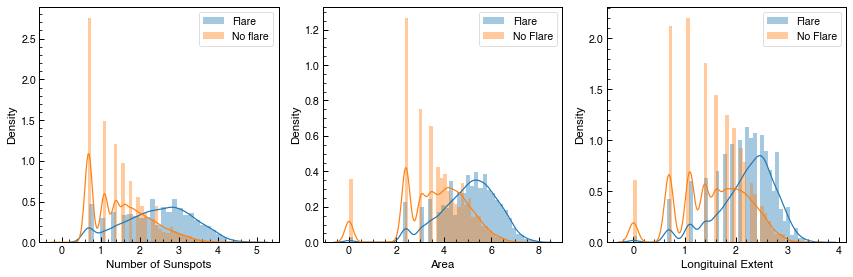

In [286]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
sns.distplot(np.log1p(ar_w_flare["No_sunspots"]), ax=ax[0], label="Flare")
sns.distplot(np.log1p(ar_no_flare["No_sunspots"]), ax=ax[0], label="No flare")
ax[0].set_xlabel("Number of Sunspots")

sns.distplot(np.log1p(ar_w_flare["AREA"]), ax=ax[1], label="Flare")
sns.distplot(np.log1p(ar_no_flare["AREA"]), ax=ax[1], label="No Flare")
ax[1].set_xlabel("Area")

sns.distplot(np.log1p(ar_w_flare["Longitude_extent"]), ax=ax[2], label="Flare")
sns.distplot(np.log1p(ar_no_flare["Longitude_extent"]), ax=ax[2], label="No Flare")
ax[2].set_xlabel("Longituinal Extent")

for a in ax:
    a.tick_params(which="both", direction="in")
    a.legend(loc="upper right")
    
plt.tight_layout()
plt.savefig("./final_overview_23_24/flare_noflare_numerical_log.png", facecolor="w", dpi=300, bbox_inches="tight")



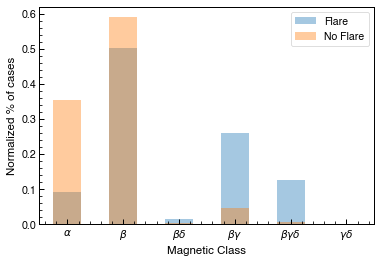

In [287]:

fig, ax = plt.subplots(1)
((ar_w_flare.groupby(["MAGTYPE"])["C"].count())/len(ar_w_flare)).plot.bar(ax=ax, 
                                                                          alpha=0.4, label="Flare")
((ar_no_flare.groupby(["MAGTYPE"])["C"].count())/len(ar_no_flare)).plot.bar(ax=ax, color="tab:orange", 
                                                                            alpha=0.4, label="No Flare")
ax.legend()
ax.set_ylabel("Normalized % of cases")
labels = [r'$\alpha$', r'$\beta$',  r'$\beta\delta$', r'$\beta\gamma$', r'$\beta\gamma\delta$', r'$\gamma\delta$',]
#plt.tight_layout()
ax.set_xticklabels(labels, rotation=0)
ax.set_xlabel("Magnetic Class")
plt.savefig("./final_overview_23_24/flare_noflare_magtype.png", facecolor="w", dpi=300, bbox_inches="tight")



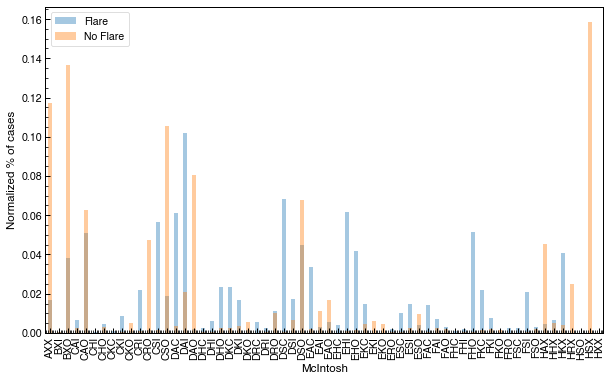

In [288]:
fig, ax = plt.subplots(figsize=(10,6))
((ar_w_flare.groupby(["McIntosh"])["C"].count())/len(ar_w_flare)).plot.bar(ax=ax, 
                                                                          alpha=0.4, label="Flare")
((ar_no_flare.groupby(["McIntosh"])["C"].count())/len(ar_no_flare)).plot.bar(ax=ax, color="tab:orange", 
                                                                            alpha=0.4, label="No Flare")
ax.legend()
ax.set_ylabel("Normalized % of cases")
plt.savefig("./final_overview_23_24/flare_noflare_zurich.png", facecolor="w", dpi=300, bbox_inches="tight")



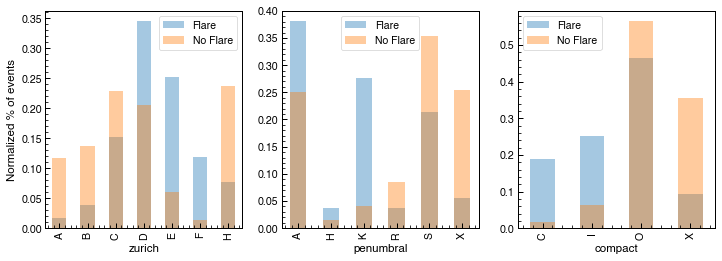

In [291]:



fig, ax = plt.subplots(1, 3, figsize=(12, 4))
((ar_w_flare.groupby(["zurich"])["C"].count())/len(ar_w_flare)).plot.bar(ax=ax[0], 
                                                                          alpha=0.4, label="Flare")
((ar_no_flare.groupby(["zurich"])["C"].count())/len(ar_no_flare)).plot.bar(ax=ax[0], color="tab:orange",
                                                                           alpha=0.4, label="No Flare")

((ar_w_flare.groupby(["penumbral"])["C"].count())/len(ar_w_flare)).plot.bar(ax=ax[1], 
                                                                          alpha=0.4, label="Flare")
((ar_no_flare.groupby(["penumbral"])["C"].count())/len(ar_no_flare)).plot.bar(ax=ax[1], color="tab:orange",
                                                                           alpha=0.4, label="No Flare")


((ar_w_flare.groupby(["compact"])["C"].count())/len(ar_w_flare)).plot.bar(ax=ax[2], 
                                                                          alpha=0.4, label="Flare")
((ar_no_flare.groupby(["compact"])["C"].count())/len(ar_no_flare)).plot.bar(ax=ax[2], color="tab:orange",
                                                                           alpha=0.4, label="No Flare")


for a in ax:
    a.legend()
    
ax[0].set_ylabel("Normalized % of events")
plt.savefig("./final_overview_23_24/flare_noflare_zurich_breakdown.png", facecolor="w", dpi=300, bbox_inches="tight")

